Windows-10-10.0.19045-SP0
Esta conectado un GW,GDS-1072A-U,EM111924,V1.06

Escala:  0.1
Offset:  -0.004
Base de tiempo:  0.00025
Leidos 8014 datos
Escala:  0.05
Offset:  0.0
Base de tiempo:  0.00025
Leidos 8014 datos


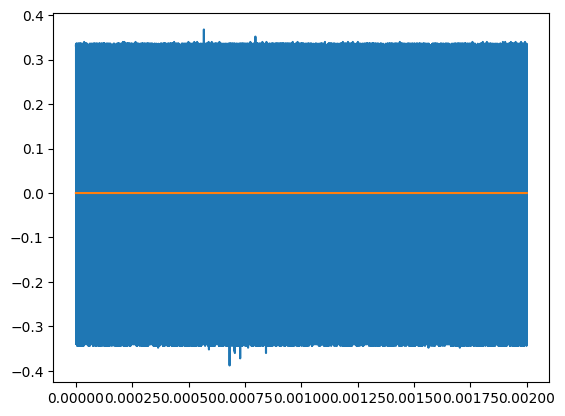

Escala:  0.1
Offset:  -0.004
Base de tiempo:  0.00025
Leidos 8014 datos
Vrms = 0.33502


In [19]:
# -*- coding: utf-8 -*-
"""
Created on Fri Jun  1 09:57:19 2018

@author: Ramiro
"""
import numpy as np
# Traemos la libreria VISA
import pyvisa as visa
# Traemos matplotlib para poder graficar
import matplotlib.pyplot as plt
# Agreamos el path de las librerias
import sys
sys.path.insert(0, 'InstVirtualLib')
import platform
# Traemos todos los osciloscopios
from InstVirtualLib.osciloscopios import GW_Instek
from InstVirtualLib.osciloscopios import rigol
from InstVirtualLib.osciloscopios import Tektronix_DSO_DPO_MSO_TDS
# Traemos el operador
import operador

# Definimos una funcion para poder ejecutar un mensaje de error
def excepthook(type, value, traceback):
    print(value)

sys.excepthook = excepthook



# Seteamos el tipo de osciloscio a utilizar
OSCILOSCOPIOS = 0	# 0: GW_Instek
			# 1: rigol
			# 2: Tektronix_DSO_DPO_MSO_TDS

USE_DEVICE = 0

# Abrimos el instrumento
platforma = platform.platform()
print(platforma)
rm=visa.ResourceManager()

instrument_handler=rm.open_resource(rm.list_resources()[USE_DEVICE])

if OSCILOSCOPIOS == 0:
	MiOsciloscopio = GW_Instek(instrument_handler)
elif OSCILOSCOPIOS == 1:
	MiOsciloscopio = rigol(instrument_handler)
elif OSCILOSCOPIOS == 2:
	MiOsciloscopio = Tektronix_DSO_DPO_MSO_TDS(instrument_handler)
else:
	raise ValueError('Tipo de osciloscopio fuera de lista.')


# Informamos el modelo del osciloscopio conectado
print("Esta conectado un %s"%MiOsciloscopio.INSTR_ID)


# Pedimos el trazo de cada canal, la salida es en ([seg.],[volt])
tiempo1,tension1=MiOsciloscopio.get_trace("1",VERBOSE=False)
tiempo2,tension2=MiOsciloscopio.get_trace("2",VERBOSE=False)

# Ploteamos los canales
plt.plot(tiempo1,tension1,tiempo2,tension2)
plt.show()


# Generamos un operador y pedimos el valor RMS actual
operador_1 = operador.Operador_osciloscopio(MiOsciloscopio,"Workbench_I")

val_RMS = operador_1.medir_Vrms(canal = 1, VERBOSE = False)

print('Vrms = %0.5f'%val_RMS)


MiOsciloscopio.close()

In [20]:
def plot_spec(signal,fs,tipo="full",win="rect"):
    espec=20*np.log10(np.abs(np.fft.fft(signal))/len(signal))
    espec=np.fft.fftshift(espec)
    fcia=np.linspace(-fs/2,fs/2,len(signal))
    if tipo=="half":
        espec=espec[len(signal)//2:]
        fcia=fcia[len(signal)//2:]
    plt.figure()
    plt.title('Espectro de la señal')
    plt.ylim(np.max(espec)-75,np.max(espec)+5)
    plt.plot(fcia,espec)

In [21]:
deltaf=75000   # desviación de fm comercial
fmsj=550e3      # frecuencia de mensaje
m=deltaf/fmsj # indice de modulacion de fm, el parametro que usamos para entrar a Bessel
fc=5e3      # frecuencia de portadora

N=2500
fbt=100e-6
div=10
fs=N/(fbt*div)
t=np.linspace(0,N/fs,N)
print("ts = {} s".format(t[1]))
print("f_Nys= {} Hz ".format(fs/2))
print("fs",fs)

ts = 4.001600640256103e-07 s
f_Nys= 1250000.0 Hz 
fs 2500000.0


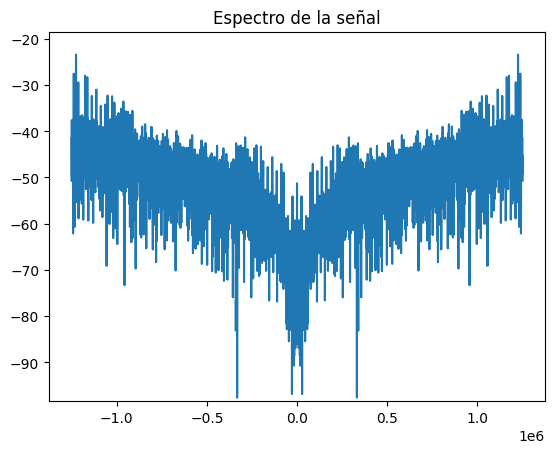

In [22]:
plot_spec(tension1,fs)